image 2


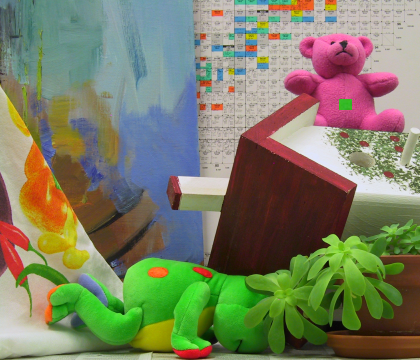

image 2 reconstructed from image 1 + flow


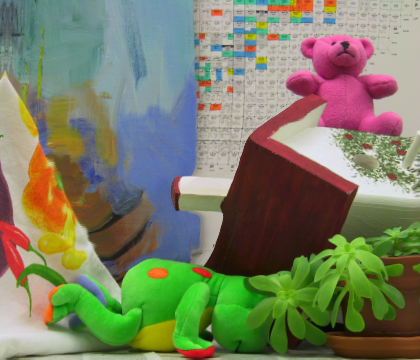

In [1]:
%load_ext autoreload
%autoreload 2

import cv2
import numpy as np

from ml4a import image
from ml4a.canvas import canvas
from ml4a.models import flownet

img1 = image.load_image('../../../FlowNetPytorch/images2/frame10.png')
img2 = image.load_image('../../../FlowNetPytorch/images2/frame11.png')

flow = flownet.run(img1, img2) 
flow = flownet.blur(flow, blur_times=10)

mapping_1to2 = flownet.flow_to_mapping(-flow)
mapping_2to1 = flownet.flow_to_mapping(flow)

img2_reconstructed = canvas.map_image(img1, mapping_1to2)
img1_reconstructed = canvas.map_image(img2, mapping_2to1)

image.display(img2, title="image 2")
image.display(img2_reconstructed, title="image 2 reconstructed from image 1 + flow")


flow map


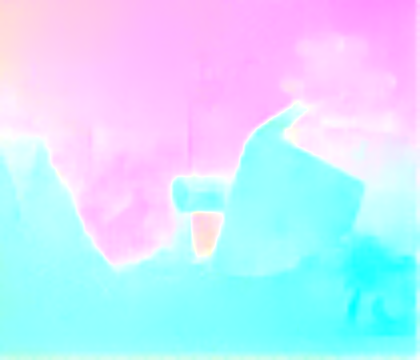

In [2]:
rgb_flow = flownet.run(img1, img2, to_rgb=True) 
image.display(rgb_flow, title='flow map')